In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Load the legendary libG

In [2]:
import sys
sys.path.append('/home/daniel/Projekte/Snippets/snippetlibrary/src/')
sys.path.append('/home/daniel/Projekte/Snippets/snippetlibrary/src/libG/')

In [3]:
import libG

Loading BokehJS ...

# Read in some example data

In [6]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], columns=[name.replace(' (cm)', '').replace(' ', '_') for name in iris['feature_names']])
data['Species'] = [iris['target_names'][i] for i in iris['target']]
data.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Plot a decision tree

In [7]:
### Model via Decision tree

parameters = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,4], 'min_samples_leaf':[20]}

label = 'Species'
attributes = [i for i in data.columns if i != label]
X = data[attributes]
Y = data[label]

model = tree.DecisionTreeClassifier()
clfs = GridSearchCV(model, parameters, cv=10)
clfs.fit(X, Y)
clf = clfs.best_estimator_

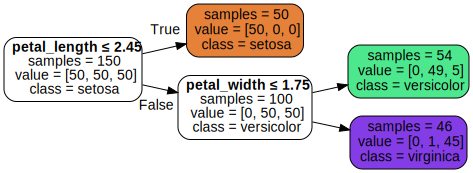

In [8]:
libG.plot_decision_tree(clf, attributes, Y.unique())

# Find outliers via KDE

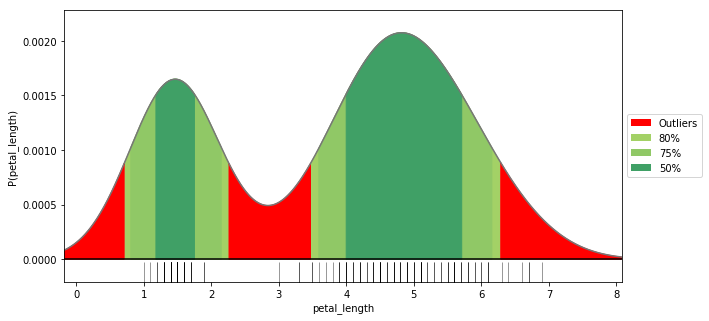

,sepal_length,sepal_width,petal_length,petal_width,Species
57,4.9,2.4,3.3,1.0,versicolor
93,5.0,2.3,3.3,1.0,versicolor
98,5.1,2.5,3.0,1.1,versicolor
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica


In [12]:
libG.outlier_1d(data, 'petal_length', quantiles=[0.8, 0.75, 0.5])

# Sort the data according to hierarchical clustering

In [14]:
sorted_data = libG.hclust_sort(data[attributes])
sorted_data.head()

,sepal_width,sepal_length,petal_length,petal_width
117,3.8,7.7,6.7,2.2
131,3.8,7.9,6.4,2.0
106,2.5,4.9,4.5,1.7
109,3.6,7.2,6.1,2.5
114,2.8,5.8,5.1,2.4


# Interactively inspect the sorted data

In [15]:
libG.plot_matrix(sorted_data)

# Solve and approximate the travelling salesman problem

In [16]:
tspdata = data[['sepal_width', 'sepal_length']]
tspdata.columns = ['X', 'Y']

In [17]:
cities = np.random.choice(range(len(data)), size=15, replace=False).tolist()
cities

[41, 107, 61, 122, 26, 62, 124, 67, 121, 39, 21, 89, 70, 32, 105]

In [18]:
def plot_path(data, cities, path, title='', color='r'):
    fig, ax = pl.subplots(figsize=(7,7))
    ax.set_title(title)
    ax.scatter(data['X'], data['Y'], color='k', facecolor='none', alpha=0.4)
    ax.scatter(data['X'].iloc[cities], data['Y'].iloc[cities], color='k', facecolor=color, alpha=0.4)
    for i in range(len(path)-1):
        start = path[i]
        end = path[i+1]
        segment = data.iloc[[cities[start], cities[end]]].values.T
        ax.plot(segment[0], segment[1], color=color, alpha=0.4)
    pl.show()
    return fig

In [19]:
path1 = libG.solve_tsp(tspdata.iloc[cities])
path1

[0, 11, 8, 7, 5, 1, 3, 14, 6, 2, 12, 13, 10, 9, 4, 0]

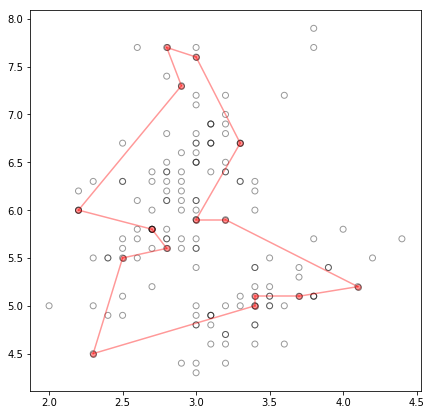

In [20]:
fig1 = plot_path(tspdata, cities, path1)

In [21]:
path2 = libG.approximate_tsp(tspdata.iloc[cities])
path2

[14, 3, 1, 6, 5, 11, 8, 7, 2, 12, 13, 10, 9, 4, 0, 14]

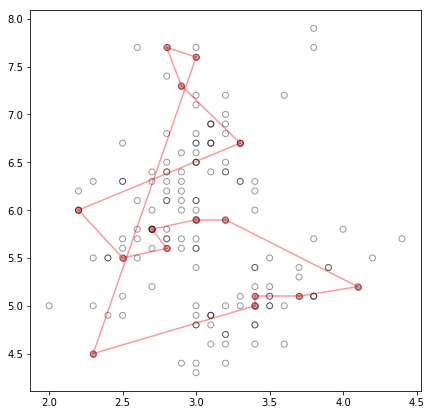

In [22]:
fig2 = plot_path(tspdata, cities, path2)

# Generate a random report

In [23]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [24]:
report = libG.Report('test.html')

report.add_header('The Iris Dataset')
report.add_text('... the first 10 entries')
report.add_table(data.head(10))

report.add_header('The Python Zen')
report.add_header('Encrypted', level=2)
report.add_text(this.s.replace('\n', '<br />'))
report.add_header('Decrypted', level=2)
report.add_text("".join([this.d.get(c, c) for c in this.s]).replace('\n', '<br />'))

report.add_header('TSP')
report.add_text('coordinates of the 15 cities')
report.add_table(tspdata.iloc[cities])
report.add_header('Exactly solved via dynamic programming', level=2)
report.add_image(fig1)
report.add_header('Approximated via simulated annealing', level=2)
report.add_image(fig2)

report.export()
report.show()